In [2]:

import pandas as pd
# import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [3]:
folder = '2009q2'
sub = pd.read_csv(folder+'/sub.txt',delimiter='\t')
tag = pd.read_csv(folder+'/tag.txt',delimiter='\t')
num = pd.read_csv(folder+'/num.txt',delimiter='\t')
pre = pd.read_csv(folder+'/pre.txt',delimiter='\t')

In [42]:

# Create a dropdown widget with options from sub names
sub_name = sub['name'].sort_values()
sub_name = sub_name.drop_duplicates(keep='first') # list of all companies
Comp_dropdown = widgets.Dropdown(
    options=sub_name.tolist(),
    description='Company:',
    layout=widgets.Layout(width='400px', height='50px')
)

# Display the dropdown widget
display(Comp_dropdown)


Dropdown(description='Company:', layout=Layout(height='50px', width='400px'), options=('1 800 FLOWERS COM INC'…

In [ ]:

cik = sub[sub['name'] == Comp_dropdown.value]['cik'].values[0] # cik correspondig to user_CompName [value]
print(f'Selected Company: {Comp_dropdown.value} -> CIK = {cik}')

adsh = sub[sub['cik'] == cik]['adsh'] # adsh corresponding to cik [series]
num_value = num[num['adsh'].isin(adsh)][['ddate','tag','value','uom']] # selection of num data with chosen cik, only 4 columns
num_value['ddate'] = pd.to_datetime(num['ddate'],format='%Y%m%d') # conversion of ddate column to date format
num_value = num_value.sort_values(by=['uom','tag','ddate']).reset_index(drop=True) # sorting by value type (uom) tag and ddate
# display(num_value)

Selected Company: APPLE INC -> CIK = 320193


In [57]:

num_uom = num_value['uom']
num_uom = num_uom.drop_duplicates(keep='first') # list of all companies
# Create the first dropdown for companies
uom_dropdown = widgets.Dropdown(
    options=num_uom.tolist(),
    description='Value type:',
    layout=widgets.Layout(width='200px', height='50px')
)

# Create the second dropdown for departments, initially empty
tag_dropdown = widgets.Dropdown(
    options=[],
    description='Tag:',
    layout=widgets.Layout(width='300px')
)

# Define a function to update the departments dropdown based on the selected company
def update_tag(change):
    selected_uom = change['new']
    tag_dropdown.options = num_value[num_value['uom'] == uom_dropdown.value]['tag'].drop_duplicates(keep='first')

# Attach the change event handler to the company dropdown
uom_dropdown.observe(update_tag, names='value')

# Initialize the departments dropdown with the departments of the first company
tag_dropdown.options = num_value[num_value['uom'] == uom_dropdown.value]['tag'].drop_duplicates(keep='first')

# Display the dropdown widgets
display(uom_dropdown, tag_dropdown)

Dropdown(description='Value type:', layout=Layout(height='50px', width='200px'), options=('USD', 'shares'), va…

Dropdown(description='Tag:', layout=Layout(width='300px'), options=('AccountsPayableCurrent', 'AccountsReceiva…

In [8]:
display(num_value[(num_value['uom'] == uom_dropdown.value) & (num_value['tag'] == tag_dropdown.value)].reset_index(drop=True) )

NameError: name 'num_value' is not defined

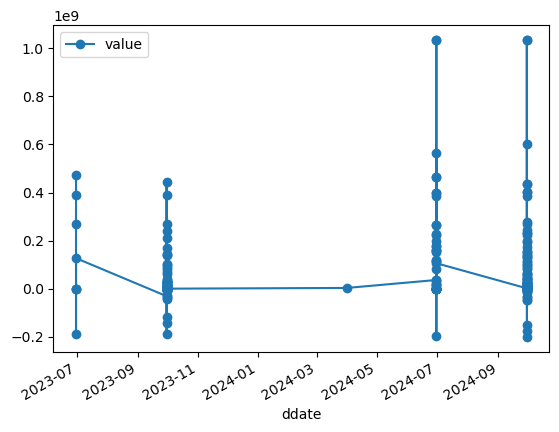

In [47]:
num_value = num[num['adsh'].isin(adsh)][['ddate','tag','value','uom']] # selection of num data with chosen cik, only 4 columns
num_value['ddate'] = pd.to_datetime(num['ddate'],format='%Y%m%d') # conversion of ddate column to date format
num_value = num_value.sort_values(by=['uom','ddate']).reset_index(drop=True)
test = num_value[num_value['uom'] == 'USD']
test.plot(x='ddate',y='value',marker='o')
plt.show()

In [14]:
pre

,adsh,report,line,stmt,inpth,rfile,tag,version,plabel,negating
0,0000038074-09-000029,1,3,BS,0,X,CashAndCashEquivalentsAtCarryingValue,us-gaap/2008,Cash and cash equivalent investments,0
1,0000038074-09-000029,1,4,BS,0,X,MarketableSecuritiesCurrent,us-gaap/2008,Marketable securities,0
2,0000038074-09-000029,1,5,BS,0,X,AccountsReceivableNetCurrent,us-gaap/2008,"Accounts receivable, net",0
3,0000038074-09-000029,1,6,BS,0,X,InventoryNet,us-gaap/2008,"Inventories, net",0
4,0000038074-09-000029,1,7,BS,0,X,DeferredTaxAssetsNetCurrent,us-gaap/2008,Deferred income taxes,0
...,...,...,...,...,...,...,...,...,...,...
1923,0001193125-09-124260,3,26,CF,0,X,NetCashProvidedByUsedInFinancingActivities,us-gaap/2008,Net Cash Provided by (Used in) Financing Activ...,0
1924,0001193125-09-124260,3,27,CF,0,X,EffectOfExchangeRateOnCashAndCashEquivalents,us-gaap/2008,Effect of exchange rate changes on cash and ca...,0
1925,0001193125-09-124260,3,28,CF,0,X,CashAndCashEquivalentsPeriodIncreaseDecrease,us-gaap/2008,"Cash and Cash Equivalents, Period Increase (De...",0
1926,0001193125-09-124260,3,29,CF,0,X,CashAndCashEquivalentsAtCarryingValue,us-gaap/2008,"Cash and Cash Equivalents, at Carrying Value, ...",0
